## Image classification of common world objects - Deep learning (VGG16)

In [1]:
#Importing basic libraries for data Handling 
import keras
import numpy as np
import glob
import shutil # For image copying to respective folder
import os
import pandas as pd


Using TensorFlow backend.


In [22]:
#All the 578 images which is to be classified is read & preproccessed 
os.chdir('C:\\Users\\swath\\OneDrive\\Attachments\\Documents\\Case3_Resources\\final_data\\final_data')


In [97]:
from keras.preprocessing.image import img_to_array
images_array = []
images = os.listdir()#Extracting all image file names and storing in separate list
for i in images:
    img = load_img(i,target_size=(224, 224)) # Size required for VGG16 model (224 X 224)
    img_array = img_to_array(img)#Converting to array of pixel intensities
    images_array.append(img_array)#Storing all 578 images


In [98]:
len(images_array)#578 images in total

578

In [99]:
#Converted to array of image array
images_array =  np.array(images_array)

In [100]:
from keras.applications.vgg16 import preprocess_input
# proccessing all images for the VGG model
VGG_images = []
for img in images_array:
    img = np.expand_dims(img, axis=0)#4 dimensions required for preproccessing
    image = preprocess_input(img)
    VGG_images.append(image)

In [101]:
#VGG proccessed images with 224X224 size and 3 channel colored image with one extra dimension added for vgg model
VGG_images = np.array(VGG_images)
VGG_images.shape

(578, 1, 224, 224, 3)

In [96]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
# load the model
model = VGG16(weights="imagenet")


In [128]:
#Predict the probability across all output classes and converting the probabilities to class labels 
predictions = [] #For all 578 images
for vgg_img in VGG_images:
    pred = model.predict(vgg_img)
    label = decode_predictions(pred)
    label = label[0][0]#Class name stored
    predictions.append(label[1])
    

In [129]:
#Preparing the file and folder list after classification
#Folder names as given in deliverable requirement
folder_names = {'laptop':'laptop','German_shepherd':'german','Arabian_camel':'arabian','Chihuahua':'chihuahua','church':'church','violin':'violin','tabby':'tabby','acoustic_guitar':'acoustic','airliner':'airliner'}
def change_folder_name(folder):
    return folder_names.get(folder)

final = pd.DataFrame({'File':images,'Folder':predictions})
final['Folder'] = final['Folder'].apply(change_folder_name)

In [49]:
final['Folder'] = final['Folder'].apply(change_folder_name)

In [137]:
# 578 images are classified under 9 unique class names 
pred_classes = set(predictions)
print(len(pred_classes))
print(pred_classes)

9
{'airliner', 'Chihuahua', 'church', 'Arabian_camel', 'violin', 'tabby', 'laptop', 'acoustic_guitar', 'German_shepherd'}


In [130]:
#Deliverable 1: File and Folder in separate csv file
final.head()

,File,Folder
0,10155271865_898cfcf33f_o.jpg,violin
1,10235901325_5071471abe_o.jpg,church
2,10650461226_be349fdc82_o.jpg,airliner
3,109443289_b3edb30465_o.jpg,laptop
4,109877767_ff8f921b95_o.jpg,violin


In [50]:
#Exporting the dataframe result to a csv
final.to_csv("File_Folder_names.csv",index = False)

In [118]:
#Testing randomly an image prediction by the pre-trained model VGG16
sample_img_pred = model.predict(VGG_images[20])

In [122]:
#Image file name
images[20]

'1343073542_808b3222c1_o.jpg'

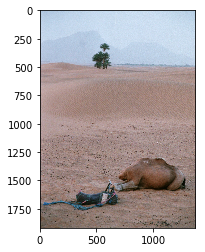

In [124]:
#loading the image and recognizing the class manually and comparing the prediction result
img_s = load_img('1343073542_808b3222c1_o.jpg')
plt.imshow(img_s)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


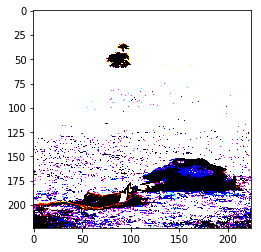

In [119]:
#Comparing the image loaded and the image stored in array format from array of images in VGG_images
import matplotlib.pyplot as plt
plt.imshow(VGG_images[20].reshape(224,224,3))

In [120]:
label = decode_predictions(sample_img_pred)
# retrieve the most likely result, e.g. highest probability among all the other label probabilities
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Arabian_camel (91.13%)


In [42]:
folders

{'acoustic',
 'airliner',
 'arabian',
 'chihuahua',
 'church',
 'german',
 'laptop',
 'tabby',
 'violin'}

In [48]:
os.chdir("E:\\Case3")
final = pd.read_csv("File_Folder_names.csv")


In [46]:
#os.chdir("E:\\Case#3\\final_data")
#final = pd.read_csv("File_Folder_names.csv")
folders = set(final['Folder'])
#Creating categorical folders to which images are to be copied after classification
for folder in folders:
    try:
        path = "E:\Case3\Categorized"
        path = os.path.join(path,folder)
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)

Successfully created the directory E:\Case3\Categorized\arabian 
Successfully created the directory E:\Case3\Categorized\laptop 
Successfully created the directory E:\Case3\Categorized\acoustic 
Successfully created the directory E:\Case3\Categorized\german 
Successfully created the directory E:\Case3\Categorized\chihuahua 
Successfully created the directory E:\Case3\Categorized\church 
Successfully created the directory E:\Case3\Categorized\violin 
Successfully created the directory E:\Case3\Categorized\tabby 
Successfully created the directory E:\Case3\Categorized\airliner 


In [ ]:
#source "E:\Case#3\final_data"
#desti "E:\Case#3\Categorized"
#Classifying images using the predicted class into respective folders ( copying the images )
def classify_images(row):
    file = row['File']
    folder = row['Folder']
    src_dir = "E:\\Case3\\Photos"
    dst_dir = "E:\\Case3\\Categorized"
    jpgfile = os.path.join(src_dir, file)
    dst_dir = os.path.join(dst_dir, folder)
    shutil.copy(jpgfile, dst_dir)

final.apply(classify_images,axis = 1)